In [3]:
import sys
import os
from deepface import DeepFace
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(sys.version)
print(np.__version__)
print(tf.__version__)

3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]
1.26.4
2.10.1


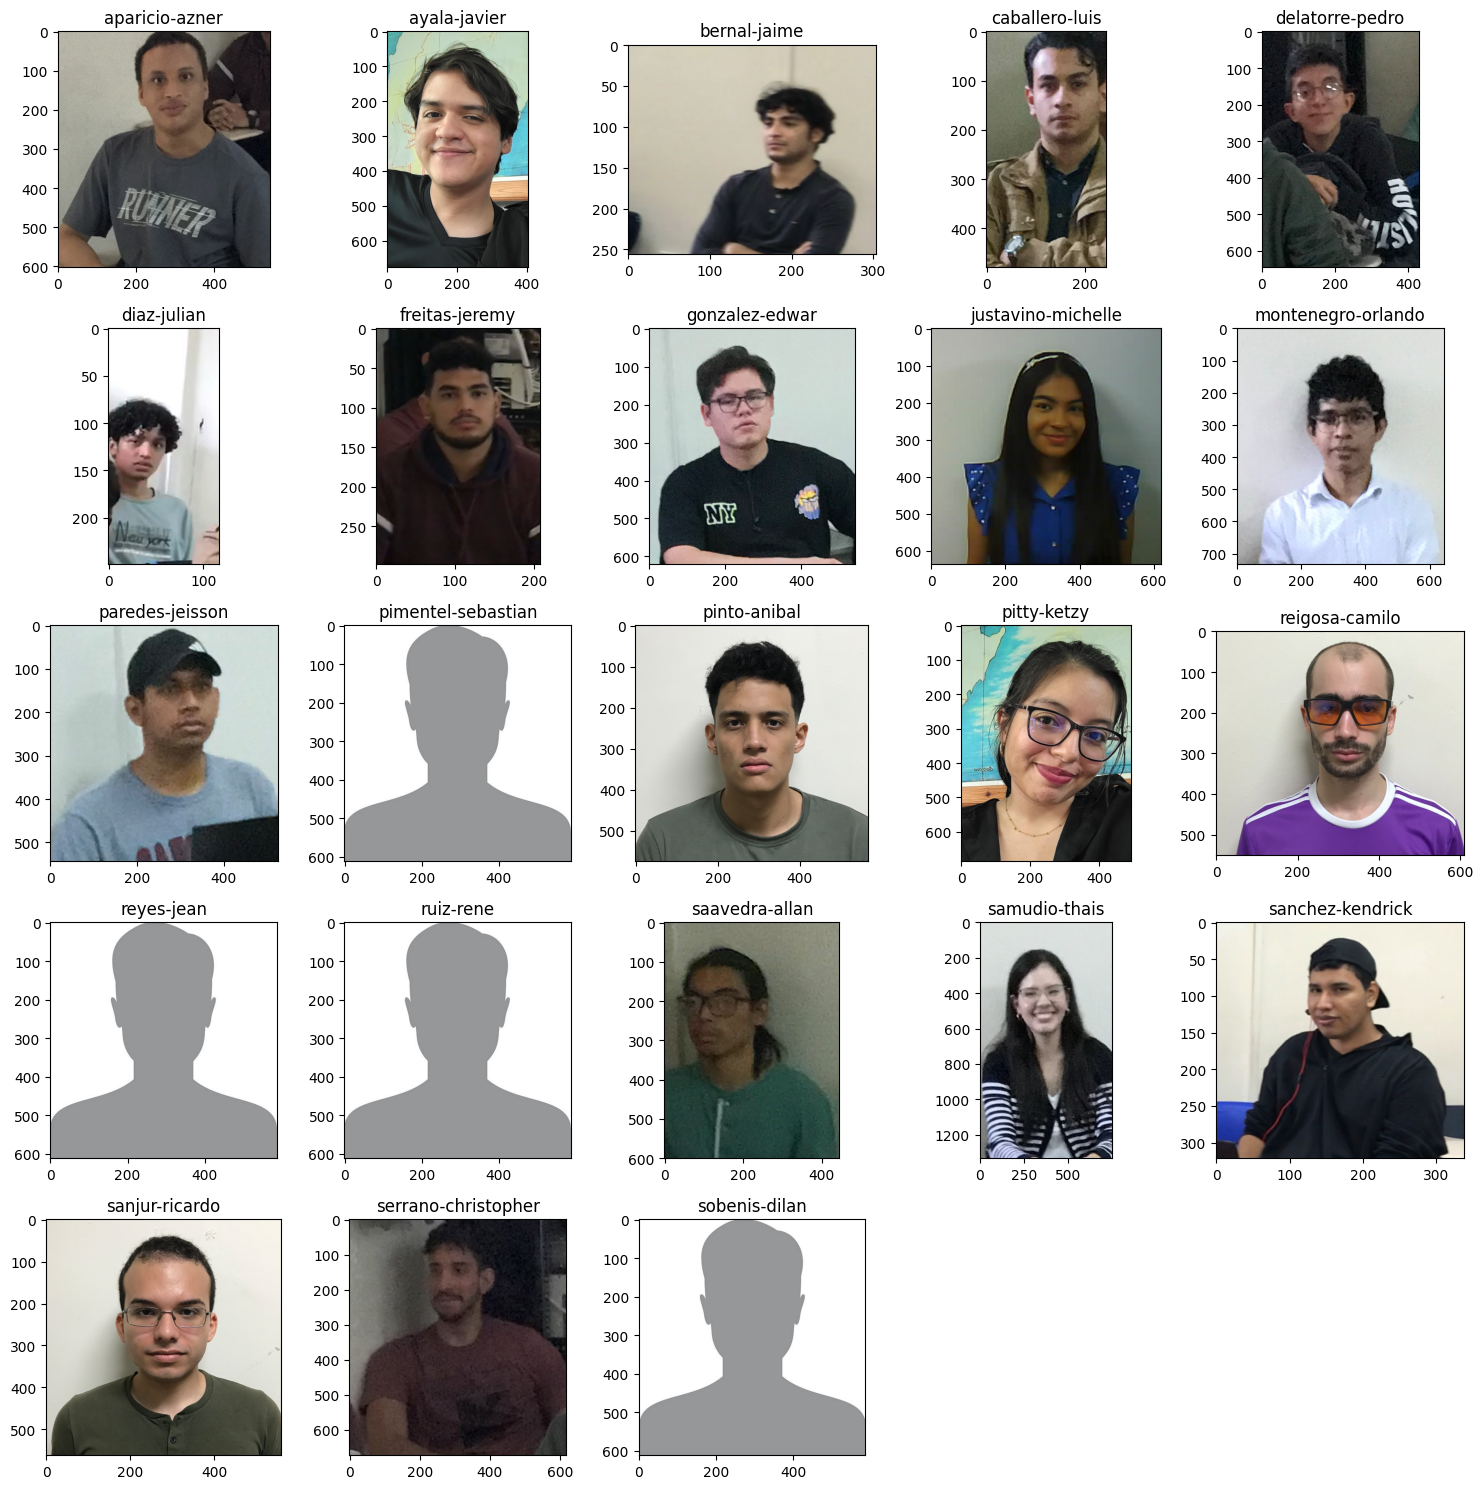

In [9]:
def get_people_dict():
    ref_directory = "./data/classroom/ref/"
    people_dict = {}

    for person_name in os.listdir(ref_directory):
        person_path = os.path.join(ref_directory, person_name)
        if os.path.isdir(person_path):
            images = [img for img in os.listdir(person_path) if img.endswith(".png") and img == "img-00.png"]
            image_paths = [os.path.join(person_path, img) for img in images]
            if image_paths:  # Asegurarse de que la imagen "img-00.jpg" exista
                people_dict[person_name] = image_paths[0]  # Guardar solo la primera imagen "img-00.jpg"
    
    return people_dict

# Genera el diccionario de personas
people_dict = get_people_dict()

# Configuración para el collage
num_students = len(people_dict)
cols = 5  # Número de columnas en el grid
rows = (num_students // cols) + (num_students % cols > 0)  # Número de filas necesarias

# Crear el collage
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()  # Facilita el acceso a cada subgrafico individualmente

for ax, (student_name, img_path) in zip(axes, people_dict.items()):
    image = mpimg.imread(img_path)
    ax.imshow(image)
    ax.set_title(student_name)
    ax.axis('on')  # Quita los ejes para un collage limpio

# Ocultar ejes no usados (en caso de que el número de imágenes no llene el grid)
for ax in axes[num_students:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
#rutas de carpetas
input_folder = "./data/classroom/test/recording_2024-10-30_13-27-20"
output_folder = "./data/classroom/test/recording_2024-10-30_13-27-20/testframes"

#crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

max_images:int = len(sorted(os.listdir(input_folder)))

# Recorrer los frames en el directorio
i:int = 0
for filename in sorted(os.listdir(input_folder)):
    if filename.endswith(".jpg"):
        # Cargar la imagen
        img_path = os.path.join(input_folder, filename)
        image = cv2.imread(img_path)

        loading = str.format("{0:.3f}", ((i+0.0)/(0.0+max_images-1.0))*100.0)
        print("\r" + loading + "%", end="")
        
        # Detectar rostros con retinaface
        faces = DeepFace.extract_faces(
            img_path=image,
            detector_backend='retinaface',
            enforce_detection=False
        )

        # Dibujar bounding boxes y mostrar la confianza
        face_count = 0
        for face_data in faces:
            facial_area = face_data['facial_area']
            confidence = face_data.get('confidence', 0)

            # Obtener las coordenadas del bounding box
            x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']

            # Dibujar el rectángulo
            color = (0, 255, 0)  # Verde
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            
            # Añadir el valor de confianza arriba del cuadro
            label = f"{confidence:.2f}"
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            
            # Contador de rostros
            face_count += 1

        # Mostrar el número de rostros detectados en la esquina superior derecha
        cv2.putText(image, f"faces: {face_count}", (image.shape[1] - 120, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        # Guardar la imagen en la carpeta de salida
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, image)
        i+=1
        print(f"Processed and saved: {filename}")

print("Processing complete.")


0.000%Processed and saved: frame-000.jpg
1.613%Processed and saved: frame-001.jpg
3.226%Processed and saved: frame-002.jpg
4.839%Processed and saved: frame-003.jpg
6.452%Processed and saved: frame-004.jpg
8.065%Processed and saved: frame-005.jpg
9.677%Processed and saved: frame-006.jpg
11.290%Processed and saved: frame-007.jpg
12.903%Processed and saved: frame-008.jpg
14.516%Processed and saved: frame-009.jpg
16.129%Processed and saved: frame-010.jpg
17.742%Processed and saved: frame-011.jpg
19.355%Processed and saved: frame-012.jpg
20.968%Processed and saved: frame-013.jpg
22.581%Processed and saved: frame-014.jpg
24.194%Processed and saved: frame-015.jpg
25.806%Processed and saved: frame-016.jpg
27.419%Processed and saved: frame-017.jpg
29.032%Processed and saved: frame-018.jpg
30.645%Processed and saved: frame-019.jpg
32.258%Processed and saved: frame-020.jpg
33.871%Processed and saved: frame-021.jpg
35.484%Processed and saved: frame-022.jpg
37.097%Processed and saved: frame-023.jpg

In [23]:

def get_people_dict():
    # Ruta del directorio de referencia
    ref_directory = "./data/classroom/ref/"

    # Crear el diccionario de personas
    people_dict = {}

    # Recorrer cada subdirectorio en el directorio de referencia
    for person_name in os.listdir(ref_directory):
        person_path = os.path.join(ref_directory, person_name)
    
        # Verificar si es un directorio (nombre de persona)
        if os.path.isdir(person_path):
            # Listar las imágenes dentro del subdirectorio de la persona
            images = [img for img in os.listdir(person_path) if img.endswith(".png")]
            image_paths = [os.path.join(person_path, img) for img in images]
        
            # Añadir al diccionario de personas
            people_dict[person_name] = {
                "images": images,
                "image_paths": image_paths
            }
    
    return people_dict

dct = get_people_dict()

print(dct)



{'aparicio-azner': {'images': ['img-00.png', 'img-01.png', 'img-02.png'], 'image_paths': ['./data/classroom/ref/aparicio-azner\\img-00.png', './data/classroom/ref/aparicio-azner\\img-01.png', './data/classroom/ref/aparicio-azner\\img-02.png']}, 'ayala-javier': {'images': [], 'image_paths': []}, 'bernal-jaime': {'images': ['img-00.png', 'img-01.png', 'img-02.png', 'img-03.png'], 'image_paths': ['./data/classroom/ref/bernal-jaime\\img-00.png', './data/classroom/ref/bernal-jaime\\img-01.png', './data/classroom/ref/bernal-jaime\\img-02.png', './data/classroom/ref/bernal-jaime\\img-03.png']}, 'caballero-luis': {'images': ['img-00.png', 'img-01.png', 'img-02.png'], 'image_paths': ['./data/classroom/ref/caballero-luis\\img-00.png', './data/classroom/ref/caballero-luis\\img-01.png', './data/classroom/ref/caballero-luis\\img-02.png']}, 'delatorre-pedro': {'images': ['img-00.png', 'img-01.png', 'img-02.png'], 'image_paths': ['./data/classroom/ref/delatorre-pedro\\img-00.png', './data/classroom/r

extracting faces...
100.000%

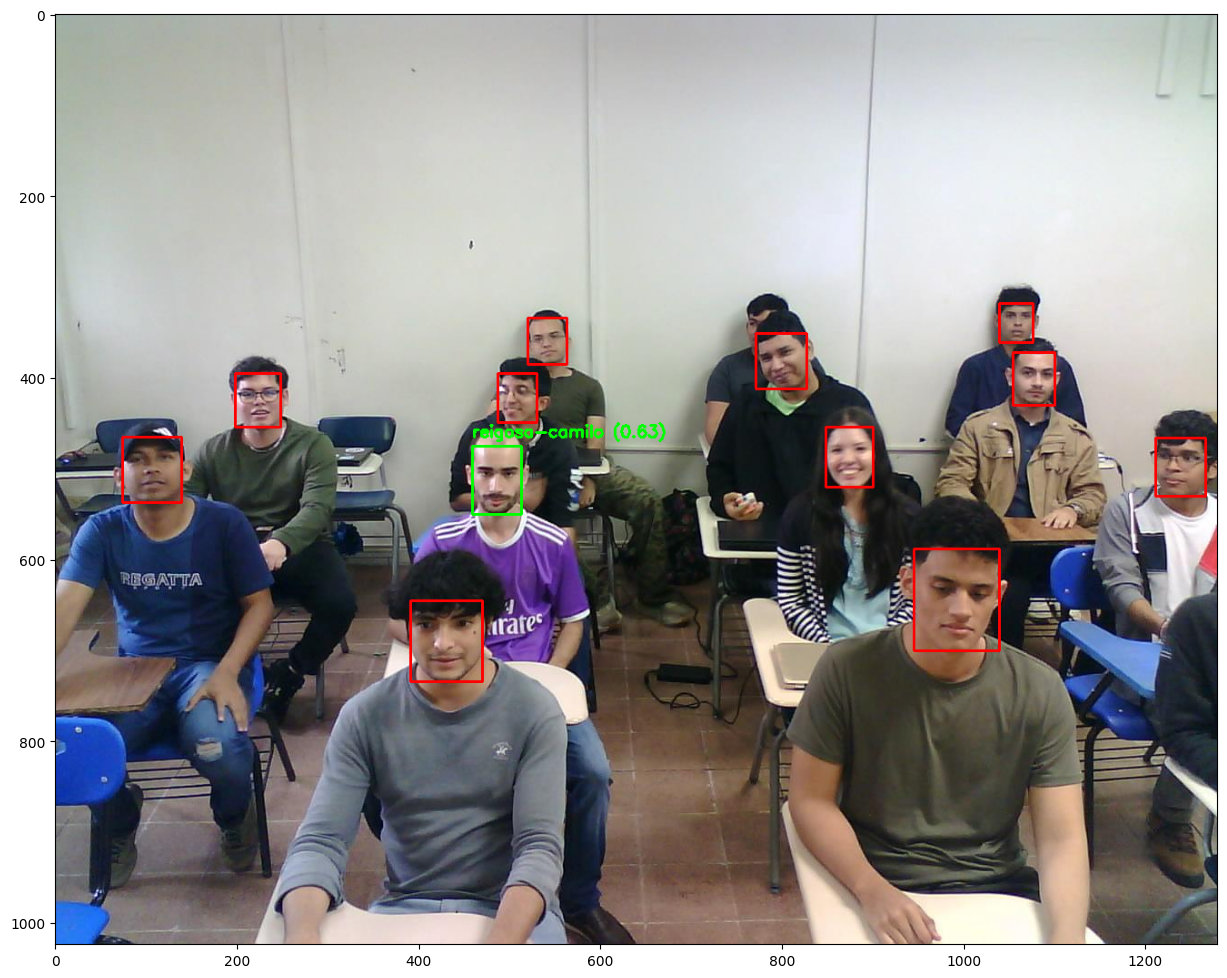

Index: 6 Distance: 0.3738
Index: 7 Distance: 0.6889
Index: 10 Distance: 0.8064
Index: 3 Distance: 0.8895
Index: 11 Distance: 0.8935
Index: 1 Distance: 0.9454
Index: 4 Distance: 0.9588
Index: 5 Distance: 1.0173
Index: 0 Distance: 1.0230
Index: 2 Distance: 1.0539
Index: 9 Distance: 1.1798
Index: 8 Distance: 1.2513


In [13]:
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace","GhostFaceNet"]

#ruta de la imagen original y del rostro objetivo (face_target)
image_path = "./data/classroom/rawdata/s2/recording_2024-11-13_10-45-09/frame-224.jpg"
face_target_path = "./data/classroom/ref/reigosa-camilo/img-00.png"

# Cargar la imagen original
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Extraer el rostro objetivo (face_target) de la imagen de referencia
target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=True)

# Inicializar la lista para almacenar los resultados
results = []

# Asegurarse de que se detectó el rostro objetivo
if len(target_face_data) > 0:
    target_face = target_face_data[0]['face']  # Obtener el rostro objetivo

    R1, G1, B1 = target_face.T
    __bgr_target_face = np.array((B1, G1, R1)).T
    bgr_target_face = (__bgr_target_face*255).astype(np.uint8)

    total_faces:int = len(faces)
    i:int = 0
    #iterar sobre cada rostro detectado en la imagen
    for face_data in faces:

        loading = str.format("{0:.3f}", ((i+0.0)/(0.0+total_faces-1.0))*100.0)
        print("\r" + loading + "%", end="")
        
        facial_area = face_data['facial_area']  #Obtener el area facial (bounding box)
        face = face_data['face']  #Obtener el rostro extraido

        R, G, B = face.T
        __bgr_face = np.array((B, G, R)).T
        bgr_face = (__bgr_face*255).astype(np.uint8)
        
        # Realizar la comparación (verificación) entre el rostro detectado y el rostro objetivo
        result = DeepFace.verify(
            img1_path=bgr_target_face,
            img2_path=bgr_face,
            detector_backend="skip",  #omitir la deteccion ya que estan los rostros
            model_name="Facenet512",
            distance_metric="cosine",
            threshold=0.49,
            enforce_detection=True
        )

        results.append([i, result['distance'], result['threshold'], 'cosine'])
        
        #si coinciden (verified=True), dibujar un rectángulo verde, sino, dibujar uno rojo
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        if result['verified']:
            color = (0, 255, 0)  # Verde
            name = "reigosa-camilo"  # Nombre del estudiante objetivo
            confidence = 1.0-result.get('distance', 0)
            label = f"{name} ({confidence:.2f})"  # Nombre y confianza
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        else:
            color = (0, 0, 255)  # Rojo
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        

        i += 1

    results.sort(key=lambda x: x[1])
    
    #convertir la imagen de BGR a RGB para visualizarla con Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Mostrar la imagen con los recuadros
    plt.figure(figsize=(15, 15))
    plt.imshow(image_rgb)
    plt.axis(True)
    plt.show()
    
    for res in results:
        print(f"Index: {res[0]} Distance: {res[1]:.4f}")
    

else:
    print("The target face was not detected.")

Extracting faces...
Processing person: aparicio-azner
Processing person: ayala-javier
Processing person: bernal-jaime
Processing person: caballero-luis
Processing person: delatorre-pedro
Processing person: diaz-julian
Processing person: freitas-jeremy
Processing person: gonzalez-edwar
Processing person: justavino-michelle
Processing person: montenegro-orlando
Processing person: paredes-jeisson
Processing person: pimentel-sebastian
Processing person: pinto-anibal
Processing person: pitty-ketzy
Processing person: reigosa-camilo
Processing person: reyes-jean
Processing person: ruiz-rene
Processing person: saavedra-allan
Processing person: samudio-thais
Processing person: sanchez-kendrick
Processing person: sanjur-ricardo
Processing person: serrano-christopher
Processing person: sobenis-dilan


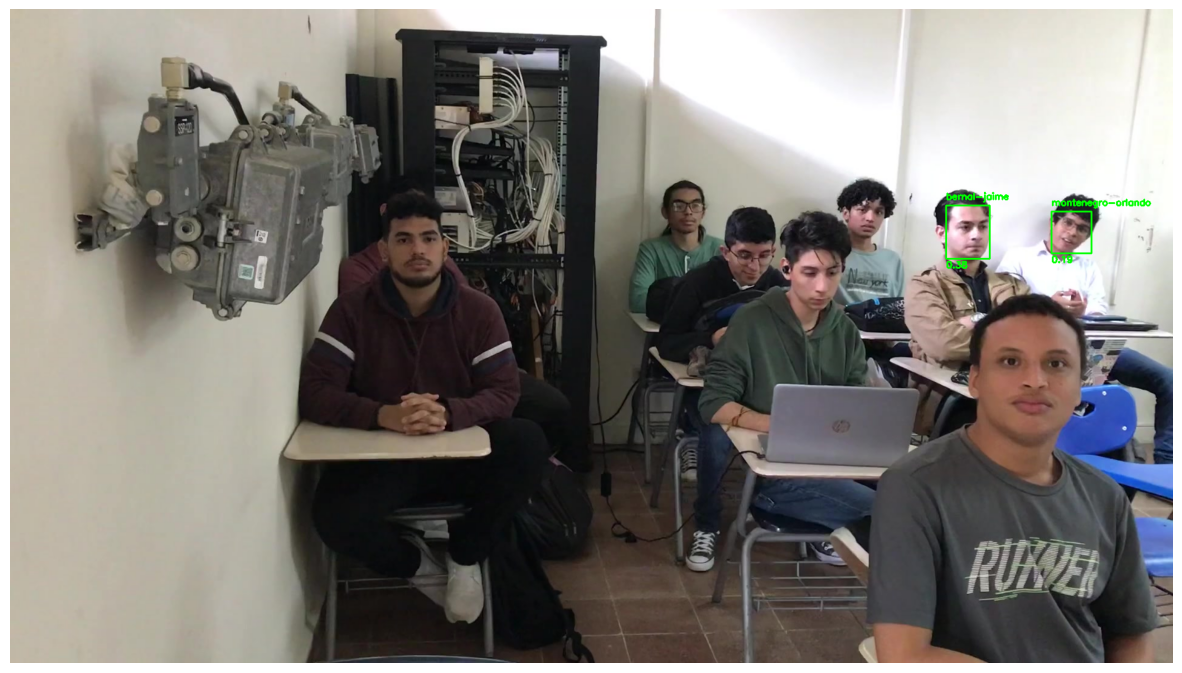

Person: aparicio-azner, Verified: False, Distance: 0.7616
Person: aparicio-azner, Verified: False, Distance: 0.7761
Person: aparicio-azner, Verified: False, Distance: 0.6464
Person: bernal-jaime, Verified: True, Distance: 0.3767
Person: bernal-jaime, Verified: False, Distance: 0.8098
Person: bernal-jaime, Verified: False, Distance: 0.8764
Person: bernal-jaime, Verified: False, Distance: 0.9221
Person: caballero-luis, Verified: False, Distance: 0.7688
Person: caballero-luis, Verified: False, Distance: 0.8414
Person: caballero-luis, Verified: False, Distance: 0.5396
Person: delatorre-pedro, Verified: False, Distance: 0.6873
Person: delatorre-pedro, Verified: False, Distance: 0.9806
Person: delatorre-pedro, Verified: False, Distance: 0.7004
Person: diaz-julian, Verified: False, Distance: 0.6897
Person: diaz-julian, Verified: False, Distance: 0.5853
Person: diaz-julian, Verified: False, Distance: 0.8705
Person: freitas-jeremy, Verified: False, Distance: 0.9195
Person: freitas-jeremy, Verif

In [31]:
# Inicializar el diccionario de personas
people_dict = get_people_dict()

# Ruta de la imagen original
image_path = "./data/classroom/test/vd/frame-002.jpg"
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("Extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Inicializar la lista de resultados
results = []

# Iterar sobre cada persona en el diccionario
for person_name, data in people_dict.items():
    
    print(f"Processing person: {person_name}")
    
    # Iterar sobre cada imagen de referencia de la persona
    for face_target_path in data["image_paths"]:
        # Extraer el rostro objetivo (face_target) de la imagen de referencia
        target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=False)
        
        if len(target_face_data) > 0:
            target_face = target_face_data[0]['face']
            R1, G1, B1 = target_face.T
            __bgr_target_face = np.array((B1, G1, R1)).T
            bgr_target_face = (__bgr_target_face * 255).astype(np.uint8)

            # Iterar sobre cada rostro detectado en la imagen de prueba
            i = 0
            while i < len(faces):
                face_data = faces[i]
                facial_area = face_data['facial_area']
                face = face_data['face']
            
                R, G, B = face.T
                __bgr_face = np.array((B, G, R)).T
                bgr_face = (__bgr_face * 255).astype(np.uint8)

                # Realizar la comparación entre el rostro detectado y el rostro objetivo
                result = DeepFace.verify(
                    img1_path=bgr_target_face,
                    img2_path=bgr_face,
                    detector_backend="skip",
                    model_name="Facenet512",
                    distance_metric="cosine",
                    threshold=0.49,
                    enforce_detection=True
                )

                # Agregar el resultado al diccionario
                x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
                color = (0, 255, 0) if result['verified'] else (0, 0, 255)
                label = person_name if result['verified'] else "Unknown"
                confidence = f"{result['distance']:.2f}"

                if result['verified']:
                    # Dibujar bounding box y etiqueta
                    color = (0, 255, 0)
                    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
                    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
                    cv2.putText(image, confidence, (x, y + h + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
                    # Eliminar el rostro detectado de la lista de rostros
                    faces.pop(i)
                i+=1
                results.append({
                    "person_name": person_name,
                    "image_path": face_target_path,
                    "detected_face_index": i,
                    "verified": result['verified'],
                    "distance": result['distance']
                })
                break
                

# Convertir a RGB y mostrar la imagen procesada
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# Imprimir resultados
for res in results:
    print(f"Person: {res['person_name']}, Verified: {res['verified']}, Distance: {res['distance']:.4f}")

extracting faces...
Processing person: aparicio-azner
100.000%Processing person: ayala-javier
Processing person: bernal-jaime
100.000%Processing person: caballero-luis
100.000%Processing person: delatorre-pedro
100.000%Processing person: diaz-julian
100.000%Processing person: freitas-jeremy
100.000%Processing person: gonzalez-edwar
100.000%Processing person: justavino-michelle
Processing person: montenegro-orlando
100.000%Processing person: paredes-jeisson
100.000%Processing person: pimentel-sebastian
Processing person: pinto-anibal
100.000%Processing person: pitty-ketzy
Processing person: reigosa-camilo
Processing person: reyes-jean
Processing person: ruiz-rene
Processing person: saavedra-allan
100.000%Processing person: samudio-thais
100.000%Processing person: sanchez-kendrick
100.000%Processing person: sanjur-ricardo
100.000%Processing person: serrano-christopher
100.000%Processing person: sobenis-dilan


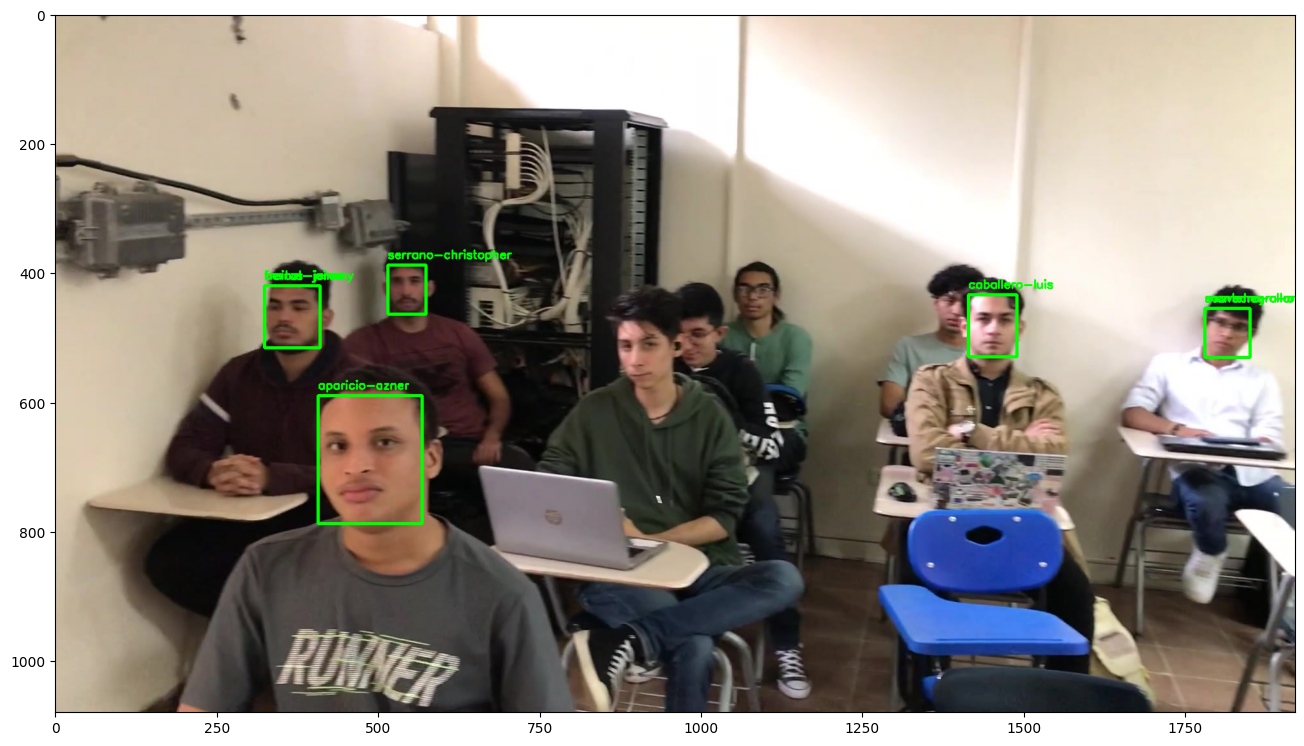

Index: 8 Distance: 0.3342 Threshold: 0.41 Metric: cosine
Index: 6 Distance: 0.6069 Threshold: 0.41 Metric: cosine
Index: 2 Distance: 0.7022 Threshold: 0.41 Metric: cosine
Index: 3 Distance: 0.7966 Threshold: 0.41 Metric: cosine
Index: 1 Distance: 0.8162 Threshold: 0.41 Metric: cosine
Index: 7 Distance: 0.8450 Threshold: 0.41 Metric: cosine
Index: 5 Distance: 0.9919 Threshold: 0.41 Metric: cosine
Index: 4 Distance: 0.9992 Threshold: 0.41 Metric: cosine
Index: 0 Distance: 1.4096 Threshold: 0.41 Metric: cosine


In [40]:
def get_people_dict():
    # Ruta del directorio de referencia
    ref_directory = "./data/classroom/ref/"

    # Crear el diccionario de personas
    people_dict = {}

    # Recorrer cada subdirectorio en el directorio de referencia
    for person_name in os.listdir(ref_directory):
        person_path = os.path.join(ref_directory, person_name)
    
        # Verificar si es un directorio (nombre de persona)
        if os.path.isdir(person_path):
            # Listar las imágenes dentro del subdirectorio de la persona
            images = [img for img in os.listdir(person_path) if img.endswith(".png")]
            image_paths = [os.path.join(person_path, img) for img in images]
        
            # Añadir al diccionario de personas
            people_dict[person_name] = {
                "images": images,
                "image_paths": image_paths
            }
    
    return people_dict

people_dict = get_people_dict()


metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace","GhostFaceNet"]    
#ruta de la imagen original y del rostro objetivo (face_target)
image_path = "./data/classroom/test/vd/frame-442.jpg"
# Cargar la imagen original
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)


index:int = 0
for person_name in people_dict:

    print("Processing person:", person_name)
    face_target_path = f"./data/classroom/ref/{person_name}/img-00.png"

    if len (people_dict[person_name]["images"]) == 0:
        continue
    
    # Extraer el rostro objetivo (face_target) de la imagen de referencia
    target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=True)

    #Inicializar la lista para almacenar los resultados
    results = []
    index+=1
    #Asegurarse de que se detectó el rostro objetivo
    if len(target_face_data) > 0:
        target_face = target_face_data[0]['face']  # Obtener el rostro objetivo

        R1, G1, B1 = target_face.T
        __bgr_target_face = np.array((B1, G1, R1)).T
        bgr_target_face = (__bgr_target_face*255).astype(np.uint8)

        total_faces:int = len(faces)
        i:int = 0
        #iterar sobre cada rostro detectado en la imagen
    
        for face_data in faces:
        
            loading = str.format("{0:.3f}", ((i+0.0)/(0.0+total_faces-1.0))*100.0)
            print("\r" + loading + "%", end="")
        
            facial_area = face_data['facial_area']  #Obtener el area facial (bounding box)
            face = face_data['face']  #Obtener el rostro extraido

            R, G, B = face.T
            __bgr_face = np.array((B, G, R)).T
            bgr_face = (__bgr_face*255).astype(np.uint8)
        
            # Realizar la comparación (verificación) entre el rostro detectado y el rostro objetivo
            result = DeepFace.verify(
                img1_path=bgr_target_face,
                img2_path=bgr_face,
                detector_backend="skip",  #omitir la deteccion ya que estan los rostros
                model_name="Facenet512",
                distance_metric="cosine",
                threshold=0.41,
                enforce_detection=True
            )

            results.append([i, result['distance'], result['threshold'], 'cosine'])
            
            #si coinciden (verified=True), dibujar un rectángulo verde, sino, dibujar uno rojo
            x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
            if result['verified']:
                color = (0, 255, 0)  # Verde
                #print(result)
                label = person_name
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                #dibujar el rectangulo en la imagen original
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 4)
            else:
                color = (0, 0, 255)  # Rojo
        
            i += 1

            results.sort(key=lambda x: x[1])
        
    else:
        print("The target face was not detected.")

#convertir la imagen de BGR a RGB para visualizarla con Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#Mostrar la imagen con los recuadros
plt.figure(figsize=(16, 16))
plt.imshow(image_rgb)
plt.axis(True)
plt.show()
        
for res in results:
    print(f"Index: {res[0]} Distance: {res[1]:.4f} Threshold: {res[2]} Metric: {res[3]}")

